# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


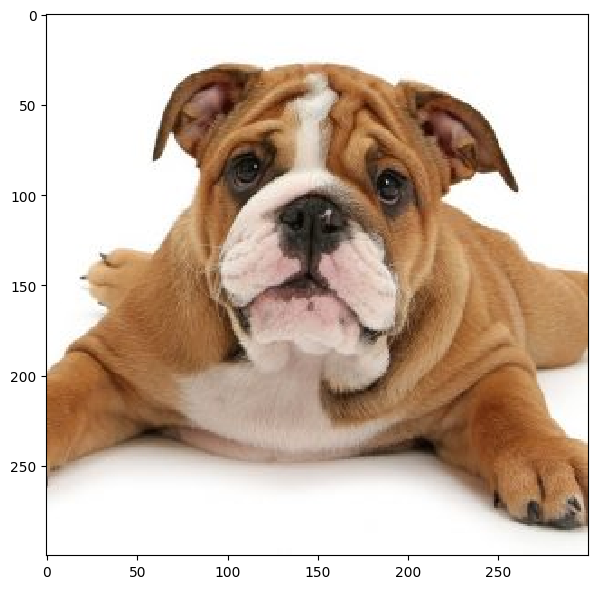

In [4]:
from google.colab import drive
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pyplot as plt
drive.mount('/content/drive')

#importacion imagen 1
file_path = '/content/drive/MyDrive/EEIGM_course-main/Image processing/dog_image.jpg'
I1 = sk.io.imread(file_path)
I1.shape #3 = couleur
#visualizacion de la imagen 1
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()



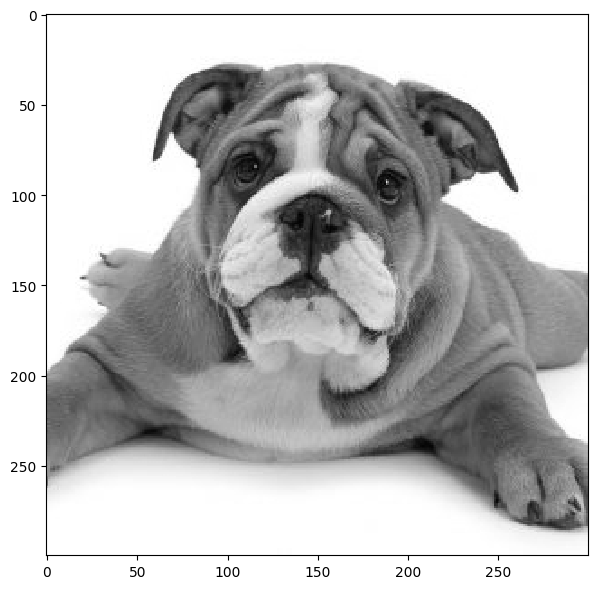

In [6]:
IG = sk.color.rgb2gray(I1)
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

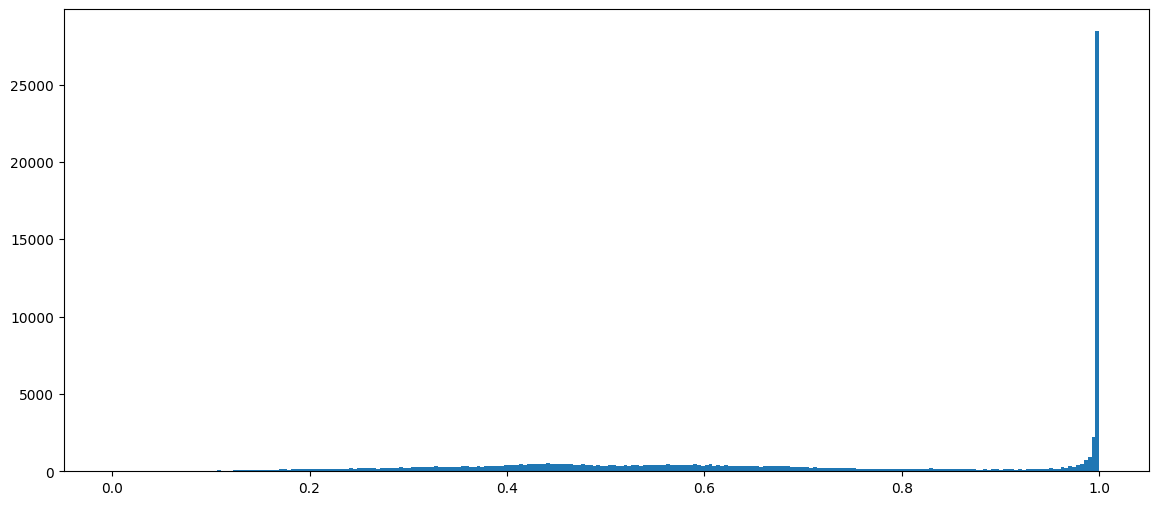

In [12]:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

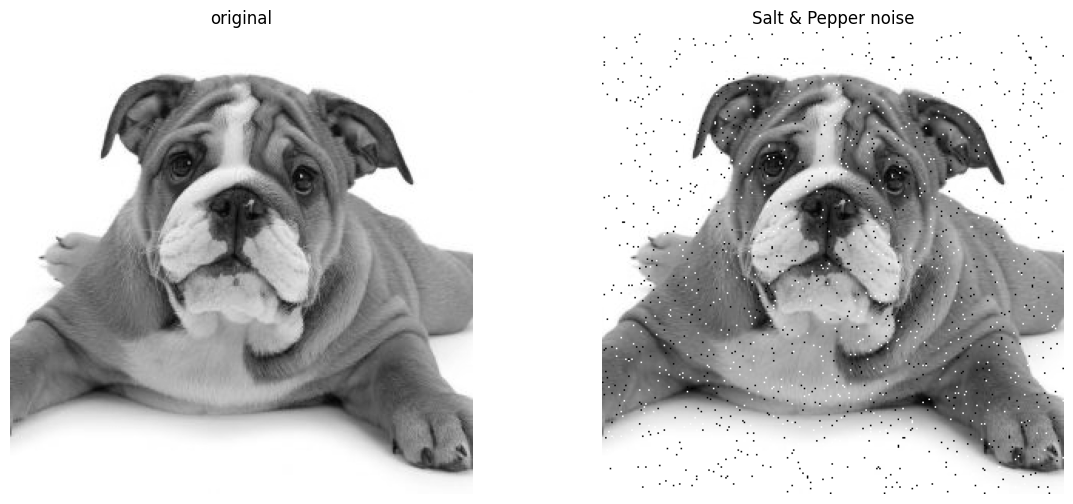

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

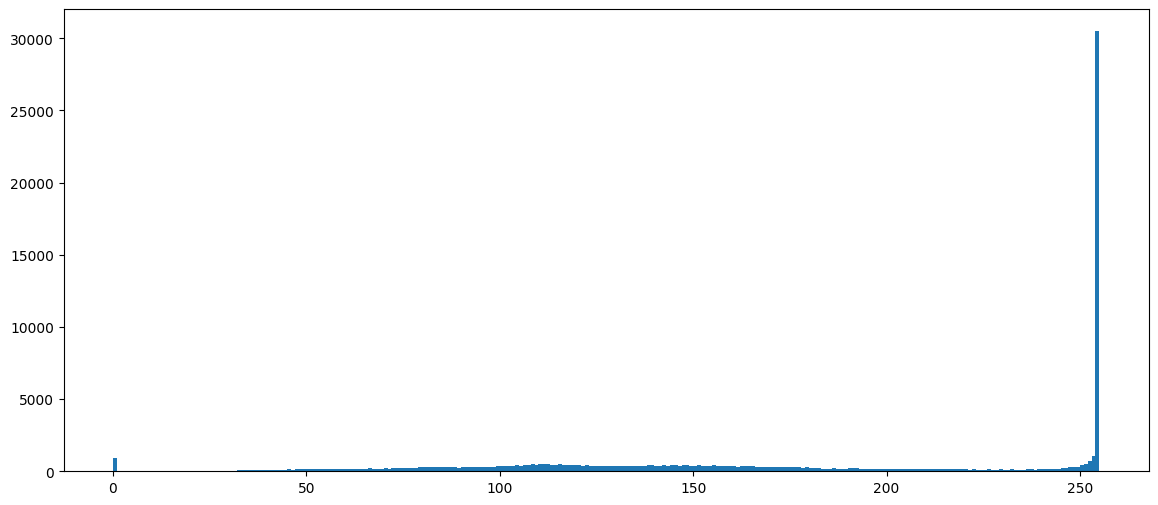

In [11]:
v = noisy_image.reshape(noisy_image.shape[0]*noisy_image.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

We can see the noise on the image and we can also see un poco on the histrogram. There are more values for 0 and 255.

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

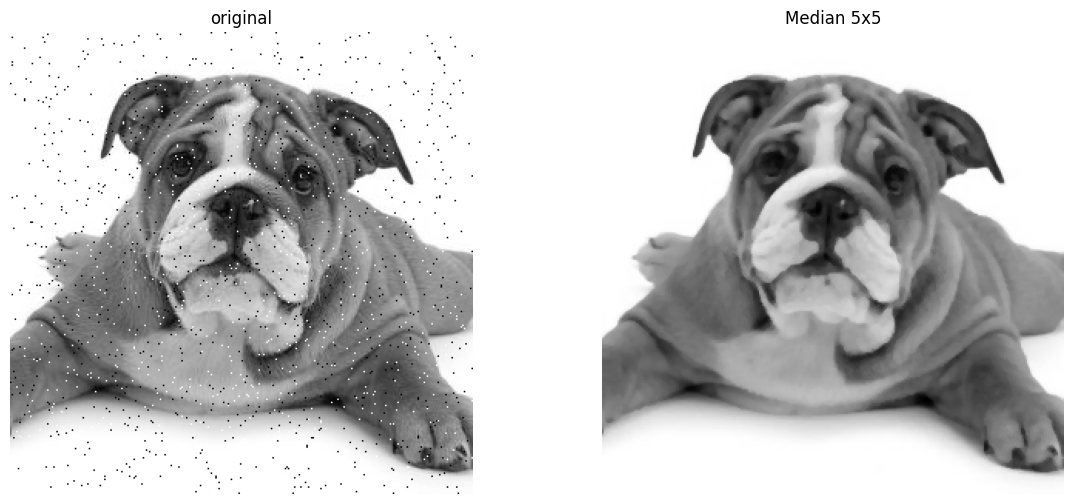

In [17]:
from skimage.morphology import disk
from skimage.filters import median
img = img_as_ubyte(noisy_image) #fonction gaussienne (mdian filter pour peu de bruit) qui localise les maximums et les corrigent
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')



We can take off the noise with a gaussian funtion that take the median value of our disk for one pixel

3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

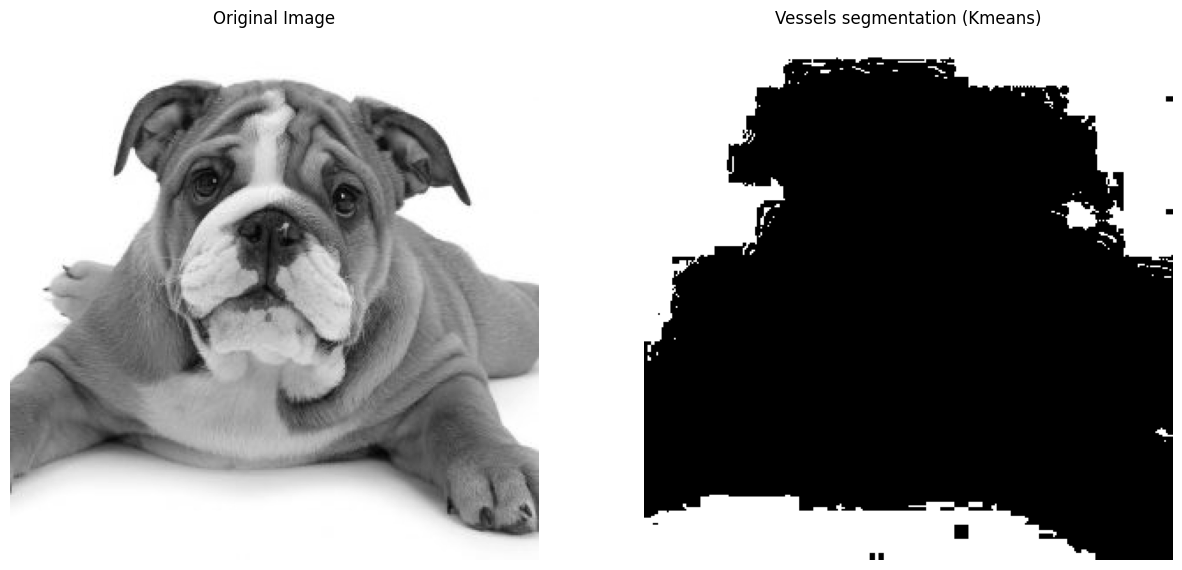

In [20]:
from sklearn.cluster import KMeans
from matplotlib import gridspec
# reshape training image as 1d array:
v_I_train = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(np.uint8)

# Fit a Kmeans clustering model with two clusters using image:
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_train)

# Apply to predict test image:
v_I_test = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(IG.shape[0],IG.shape[1]).astype(np.uint8) # Shape back result as image

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

Shannon =6.175805600023785
Entropy = 6.022425085689919
Shannon entropy=6.175805600023785 bits/pixel


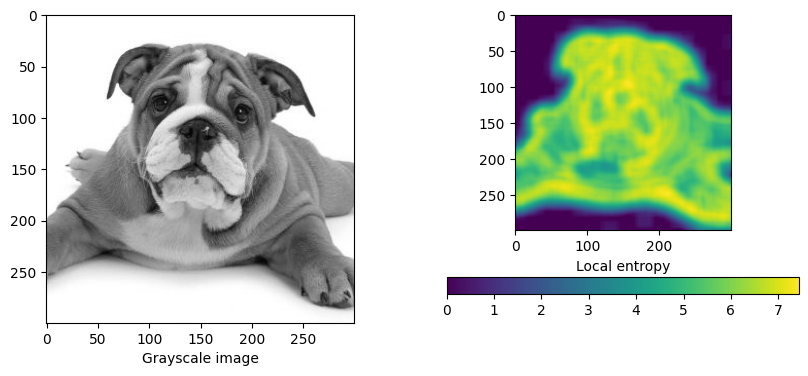

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.measure import shannon_entropy
import skimage as sk

def entropy_image(imgG):

    img = img_as_ubyte(imgG) # convert to uint8

# Local entropy in a certain pixel neiborhood:
    entr_img = entropy(img, np.ones((21,21)))
    shannon_img = shannon_entropy(img)
    print('Shannon ={}'.format(shannon_img))
# Flatten the image (convert from matrix to vector):
    v = img.flatten()
# For each grayscale leve, get the pixel probability of occurrence:
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
# Compute Shannon's entropy:
    H_noise = -np.sum(probg * np.log2(probg), axis=0)
# Compare:
    print('Entropy = {}'.format(H_noise))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax1.imshow(img, cmap='gray')
    ax1.set_xlabel("Grayscale image")
    h1 = ax2.imshow(entr_img, cmap='viridis')
    ax2.set_xlabel("Local entropy")
    fig.colorbar(h1,ax=ax2,orientation='horizontal') # visualize colorbar
    return entr_img,shannon_img

    print('Dogs:')

imgG = sk.color.rgb2gray(I1)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?

It can be useful to   to identify defects or anomalies in the structure on the image.